**Загрузка данных**

In [1]:
import pandas as pn
import numpy as np

In [37]:
titanic = pn.read_csv('./titanic/train.csv')
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Решение Easy**

In [3]:
countAllPassangers = titanic['PassengerId'].count()

In [4]:
countMalePassengers = titanic[titanic['Sex'] == 'male']['PassengerId'].count()
countFemalePassengers = titanic[titanic['Sex'] == 'female']['PassengerId'].count()
percentMalePassengers = countMalePassengers / countAllPassangers
percentFemalePassengers = countFemalePassengers / countAllPassangers
countSmallPassengers = titanic[titanic['Age'] < 18]['PassengerId'].count()
percentSmallPassengers = countSmallPassengers / countAllPassangers
print('Количество мужчин на борту судна, включая детей: ', countMalePassengers, '(', f'{percentMalePassengers:0.2%}', ')' )
print('Количество женщин на борту судна, включая детей: ', countFemalePassengers, '(', f'{percentFemalePassengers:0.2%}', ')' )
print('Количество  детей (пассажиров не достигших 18 лет): ', countSmallPassengers, '(', f'{percentSmallPassengers:0.2%}', ')')

Количество мужчин на борту судна, включая детей:  577 ( 64.76% )
Количество женщин на борту судна, включая детей:  314 ( 35.24% )
Количество  детей (пассажиров не достигших 18 лет):  113 ( 12.68% )


**Решение Medium**

Гистограмма распределение пассажиров по возрастам

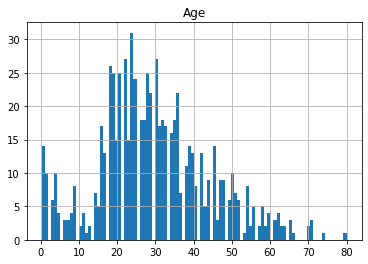

In [5]:
plot = titanic.hist(column=['Age'], bins = 100)

Работа с NaN

In [6]:
titanic['Cabin'][0]
np.isnan(titanic['Cabin'][0])
print('Value Cabin[0]: ', titanic['Cabin'][0])
print("Is float nan:", float('nan') == titanic['Cabin'][0])
print("Is numpy nan:", np.isnan(titanic['Cabin'][0]))
print("Is numpy nan:", titanic['Cabin'][0] == np.nan)

Value Cabin[0]:  nan
Is float nan: False
Is numpy nan: True
Is numpy nan: False


Поиск отсутствующих данных

In [7]:
missingRecords = pn.DataFrame({'Total Records' : titanic.count()})
fullRecordsCount = titanic.count().max()
missingDataSeries = titanic.count().apply(lambda qty: fullRecordsCount-qty)
missingRecords['Missing Records'] = missingDataSeries
missingRecords['Data Complete, %'] = 100 - (round(missingRecords['Missing Records'] / fullRecordsCount * 100, 2))
missingRecords

,Total Records,Missing Records,"Data Complete, %"
PassengerId,891,0,100.00
Survived,891,0,100.00
Pclass,891,0,100.00
Name,891,0,100.00
Sex,891,0,100.00
Age,714,177,80.13
SibSp,891,0,100.00
Parch,891,0,100.00
Ticket,891,0,100.00
Fare,891,0,100.00


In [8]:
seriesCount = pn.Series({'Мужчины' : countMalePassengers, 'Женщины' : countFemalePassengers, 'Дети' : countSmallPassengers})
survivorsPassengers = titanic[titanic['Survived'] == 1]
survivorsChildCount = survivorsPassengers[survivorsPassengers['Age'] < 18]['PassengerId'].count()
survivorsMaleCount = survivorsPassengers[survivorsPassengers['Sex']== 'male']['PassengerId'].count()
survivorsFemaleCount = survivorsPassengers[survivorsPassengers['Sex']== 'female']['PassengerId'].count()
seriesSurvors = pn.Series({'Мужчины' : survivorsMaleCount, 'Женщины' : survivorsFemaleCount, 'Дети' : survivorsChildCount})
percentSurvorsInGroup = seriesSurvors / seriesCount
percentSurvorsInAll = seriesSurvors / countAllPassangers
#seriesNames = pn.Series(['Всего', 'Выжило'])
survorsTable = pn.DataFrame({'Всего' : seriesCount})
survorsTable['Выжило'] = seriesSurvors
survorsTable['% выживших в группе'] = round(percentSurvorsInGroup * 100, 2)
survorsTable['% выживших от общего числа'] = round(percentSurvorsInAll * 100, 2)
survorsTable

,Всего,Выжило,% выживших в группе,% выживших от общего числа
Мужчины,577,109,18.89,12.23
Женщины,314,233,74.20,26.15
Дети,113,61,53.98,6.85


Корреляция выживаемости в зависимости от возраста

In [9]:
titanic['Age'].corr(titanic['Survived'])

-0.07722109457217763

Корреляция выживаемости в зависимости от того, являлся пассажир ребенком или нет

In [10]:
titanic['IsChild'] = titanic['Age'] < 18
titanic['IsChild'].corr(titanic['Survived'])

0.12223897377570021

Корреляция зависимости выживаемости от пола пассажира

In [11]:
(titanic['Sex'] == 'male').corr(titanic['Survived'])

-0.5433513806577551

Корреляция зависимости выживаемости от класса пассажира

In [12]:

titanic['Pclass'].corr(titanic['Survived'])

-0.3384810359610153

**Решение Hard**

Создадим функции, расчитывающую количество пассажиров по классам их билетов

In [13]:
def countByClass(titanic, pclass):
    if pclass == 0:
        return titanic.PassengerId.count()
    return titanic[titanic.Pclass == pclass].PassengerId.count()
def createSeriesClass(titanic):
    ser = []
    for x in range(4):
        ser.append(countByClass(titanic, x))
    return ser

Создадим функцию формирующую сводную таблицу выживаемости по мужчинам или женщинам, в зависимости от аргумента 'sex' и класса билета пассажира.

In [86]:
def createSurvivedTable(customTitanic, sex):
    resultTable = pn.DataFrame(pn.Series([sex + ' total', sex + ' 1-st class', sex + ' 2-st class', sex + ' 3-th class']))
    titanicSex = customTitanic[customTitanic.Sex == sex]
    resultTable['Total'] = pn.Series(createSeriesClass(titanicSex))
    resultTable['Survived'] = pn.Series(createSeriesClass(titanicSex[titanicSex['Survived'] == 1]))
    resultTable['Survived %'] = (resultTable['Survived'] / resultTable['Total']) * 100
    return resultTable

Создадим таблицу мужчин по классам их билетов и рассчитам процент выживаемости для каждой категории

In [104]:
tf = titanic[titanic.Sex == 'male']
maleSurvived = createSurvivedTable(tf, 'male')
maleSurvived

,0,Total,Survived,Survived %
0,male total,577,109,18.890815
1,male 1-st class,122,45,36.885246
2,male 2-st class,108,17,15.740741
3,male 3-th class,347,47,13.544669


Не зависимо от класса проезда, процент выживаемости мужчин меньше 50%. Лучшим предсказанием будет в этом случае считать любого мужчину погибшим

Создадим аналогичную сводную таблицу выживаемости у женщин, в зависимости от их класса билета

In [103]:
tf = titanic[titanic.Sex == 'female']
femaleSurvived = createSurvivedTable(tf, 'female')
femaleSurvived

,0,Total,Survived,Survived %
0,female total,314,233,74.203822
1,female 1-st class,94,91,96.808511
2,female 2-st class,76,70,92.105263
3,female 3-th class,144,72,50.000000


Выживаемость женщин в первых двух классах существенно выше 50%. Лучшим предсказанием для этих групп будет выживаемость.
Найдем дополнительный предиктор для женщин с билетами третьего класса. Например возраст:

In [108]:
tf = titanic[titanic.Sex == 'female']
femaleSurvived = createSurvivedTable(tf, 'female')
femaleSurvived = createSurvivedTable(tf[(tf.Age > 40) & (tf.Age < 90)], 'female')
femaleSurvived

,0,Total,Survived,Survived %
0,female total,48,37,77.083333
1,female 1-st class,26,25,96.153846
2,female 2-st class,13,11,84.615385
3,female 3-th class,9,1,11.111111


Выживаемость женщин старшего возраста в третьем классе составляет 11 процентов, в то время как в другх классах возраст женщин практически не влияет на выживаемость, она остается высокой для этих классов.

Создадим итоговую модель

In [132]:
titanicTest = pn.read_csv('./titanic/test.csv')

In [142]:
def survived(series):
    if series['Sex'] == 'male':
        return 0
    if series['Pclass'] != 3:
        return  1
    if series['Age'] > 40:
        return 0
    return 1
sur = []
for index, row in titanicTest.iterrows():
    sur.append(survived(row))
survivedForecast = pn.Series(sur)
titanicTest['Survived'] = pn.Series(sur)
model = pn.DataFrame(titanicTest.PassengerId)
model['Survived'] = titanicTest['Survived'];
model.to_csv('./titanic/model.csv', index = False)